# Tutorial - Visualization with Matplotlib

[<< Back to Data Wrangling with Pandas and Geopandas](2-data-wrangling-in-python.ipynb)

[>> Next :Introduction to IFM contrib](https://github.com/DHI/ifm_contrib/blob/master/doc/Notebooks/getting_started.ipynb)

***

###  Time Series (pandas and standard)

We have already learned the pandas way in the Data Wrangling Tutorial. This is good for quick typing:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reload the previous DataFrame
df_pivot = pd.read_excel("./example_data/df_pivot.xlsx").set_index("Calendar")
df_pivot

,well1,well2,well3,well4,well5,well6,well7,well8,well9
Calendar,,,,,,,,,
2018-01-01 00:00:00.000,282.355087,284.927644,287.622602,304.253642,301.389564,300.247835,295.997291,293.399888,290.918312
2018-01-01 00:01:26.400,282.360041,284.932594,287.627552,304.258596,301.394516,300.252795,296.002262,293.404844,290.923290
2018-01-01 04:51:44.574,282.364786,284.937580,287.632981,304.263494,301.399505,300.256153,296.007872,293.410269,290.928536
2018-01-05 06:12:17.350,282.367443,284.943866,287.650610,304.267792,301.400036,300.228460,296.019664,293.424332,290.936270
2018-01-09 23:02:34.896,282.375180,284.951206,287.666750,304.271265,301.397205,300.192611,296.029670,293.438521,290.944202
...,...,...,...,...,...,...,...,...,...
2026-12-03 06:27:20.377,277.172593,280.358881,281.588717,298.772300,295.065743,292.623585,291.275982,287.210070,284.265134
2026-12-06 00:30:14.606,277.157283,280.347341,281.552457,298.772508,295.043035,292.600980,291.270561,287.194123,284.255554
2026-12-12 08:16:22.035,277.123304,280.320481,281.486608,298.767232,294.985092,292.555157,291.256507,287.158171,284.230218


First we import matplotlib and set Jupyter to plot its output inline with the magic `%matplotlib inline` command. 

In [3]:
%matplotlib inline  
import matplotlib.pyplot as plt

then we plot the timeseries data using the `plot`- method

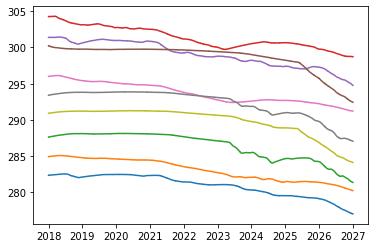

In [4]:
plt.plot(df_pivot)  
None # None is a dummy variable, to keep the output clean

In [5]:
# get a list of all column names
list(df_pivot.columns)

['well1',
 'well2',
 'well3',
 'well4',
 'well5',
 'well6',
 'well7',
 'well8',
 'well9']

This looks the same as in the Data Wrangling Tutorial (without the automatic legend). The reason to do it this way is to get more control over the plot, e.g. by choosing your own labels instead of the column names:

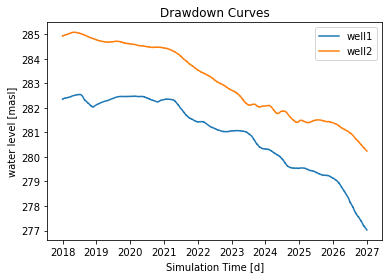

In [6]:
plt.plot(df_pivot.index, df_pivot.well1, label="well1")  # plot and choose label
plt.plot(df_pivot.index, df_pivot.well2, label="well2")  # plot and choose label
plt.legend()  # activate legend, now using the labels we chose
plt.xlabel("Simulation Time [d]")  # set x-label
plt.ylabel("water level [masl]")  # set y-label
plt.title("Drawdown Curves")  # set title
plt.plot()  # finally, create the plot
None

###  Scatter

Scatter plots are the workhorse for comparing to data sets, like model-to-measurement misfit.
In this case, we compare the behavior of two different observation points.

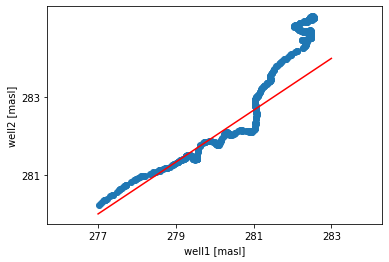

In [7]:
plt.scatter(df_pivot.well1, df_pivot.well2)
plt.xlabel("well1 [masl]")  # set x-label
plt.ylabel("well2 [masl]")  # set y-label

plt.xticks(range(277, 285, 2))  # set ticks on x-axis
plt.yticks(range(277, 285, 2))  # set ticks on y-axis
plt.axis("equal")  # set equal scale to x- and y-axis

plt.plot([277,283],[280,284],"r")  # add  bisecting line


###  Histogram (including output)

Histograms are a useful expression of frequency distribution.
Besides plotting the distribution to screen, the `plt.hist()` method also returns the contents of the histogram for further processing.


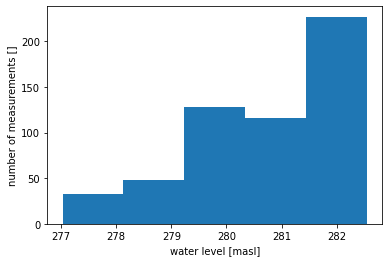

In [8]:
n, bins, patches  = plt.hist(df_pivot.well1, bins=5)
plt.xlabel("water level [masl]")
plt.ylabel("number of measurements []")
plt.show()

In [9]:
# list of bins and frequency 
list(zip(bins, n))

[(277.0260274264406, 33.0),
 (278.13060275816895, 48.0),
 (279.2351780898973, 128.0),
 (280.33975342162574, 116.0),
 (281.4443287533541, 227.0)]

###  Layouting (chart elements, multiple axes / figures)

Multiple figures are often desired. The matplotlib allows different ways, a simple and common one is the usage of the `plt.subplots()` method.
The example returns a `Figure` and a tuple of `Axis`. 

A subsequent plotting command is then done on the axis (e.g. `ax.plot()` instead of `plt.plot()`).

The axis can also be provided to a pandas-plot.

Text(0.5, 0, 'Water Level [masl]')

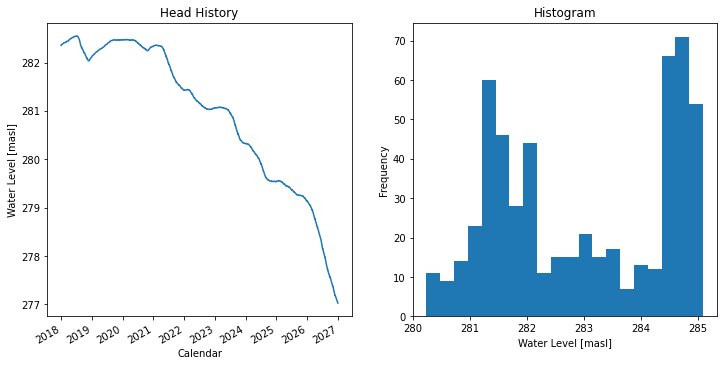

In [10]:
# create a figure with two subplot (1 row, 2 columns), and specify a 12 by 6 inch large figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# use pandas to show simulated values as plot on left windows (axis 1) and histogram on right (axis 2)
df_pivot.well1.plot(ax=ax1)
df_pivot.well2.plot.hist(bins=20, ax=ax2)

# set title and labels to corresponding subplot, addressing the axis again:
ax1.set_title("Head History")
ax1.set_ylabel("Water Level [masl]")

ax2.set_title("Histogram")
ax2.set_xlabel("Water Level [masl]")

### More Options

The matplotlib gallery shows a number of examples of further visualization style, including ready-to-use source codes:


https://matplotlib.org/gallery.html

###  Saving files

Matplotlib is meant to create publishing-quality images. Once you are happy with your figure, issue the `plt.savefig()` command **before** the `plt.plot()` command to export the image. Recommended image format is PNG.

[]

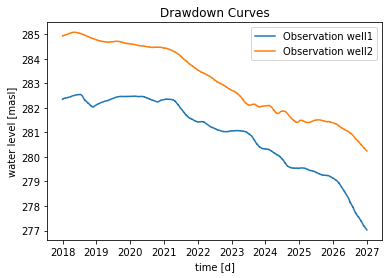

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline  
# the magic command is important!

plt.plot(df_pivot.index, df_pivot.well1, label="Observation well1")
plt.plot(df_pivot.index, df_pivot.well2, label="Observation well2")
plt.xlabel("time [d]")
plt.ylabel("water level [masl]")
plt.title("Drawdown Curves")
plt.legend()

plt.savefig("timeseries.png")
plt.savefig("timeseries.svg")
plt.plot()